In [ ]:
import os
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_files = list(Path("../../logs/breaking_points_fainder").rglob("*.csv"))

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
#"timestamp",fainder_mode","filter_size_wrong","filter_size_right","filter_size","execution_time", "execution_time_first","num_results_first","num_results","query"

# add a column number of fainder mode changes
df_latest["fainder_mode_change"] = 0
df_latest.loc[1:, "fainder_mode_change"] = (df_latest["fainder_mode"] != df_latest["fainder_mode"].shift()).cumsum()
print(df_latest)

               timestamp fainder_mode  filter_size_wrong  filter_size_right  \
0    2025-03-20 11:51:48   low_memory                  0                  0   
1    2025-03-20 11:51:49   low_memory               2224             163229   
2    2025-03-20 11:51:52   low_memory               6904             468489   
3    2025-03-20 11:51:57   low_memory              10366             723259   
4    2025-03-20 11:52:01   low_memory              10522             764625   
..                   ...          ...                ...                ...   
634  2025-03-20 15:14:42        exact             293717            3319399   
635  2025-03-20 15:15:08        exact             293727            3319453   
636  2025-03-20 15:15:35        exact             293755            3323064   
637  2025-03-20 15:16:02        exact             312714            3329434   
638  2025-03-20 15:16:29        exact             315007            3345802   

     filter_size  execution_time  execution_time_fi

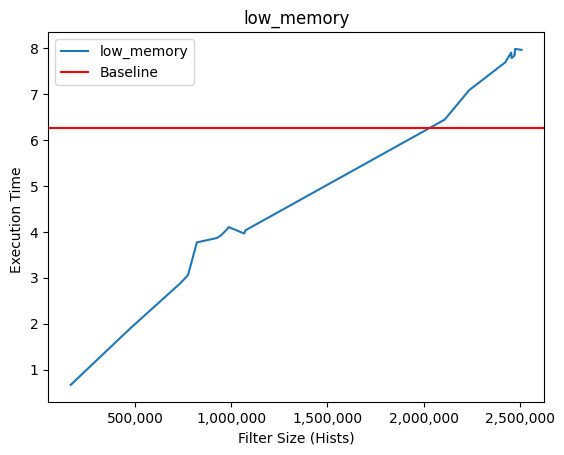

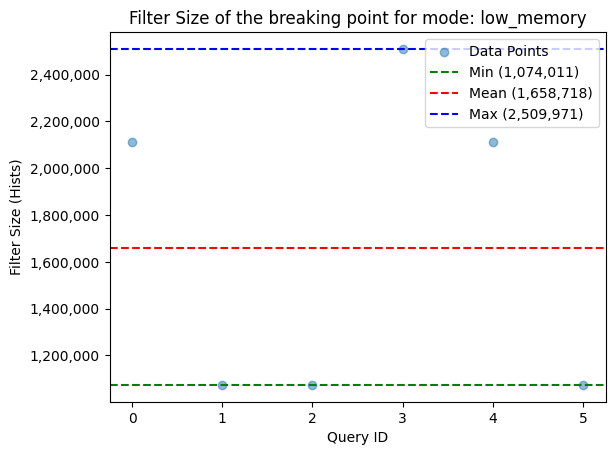

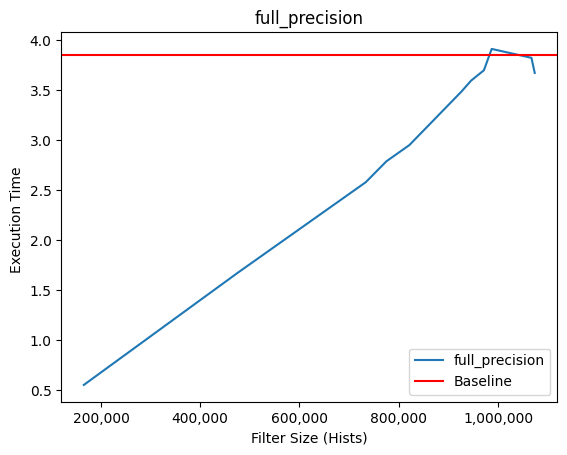

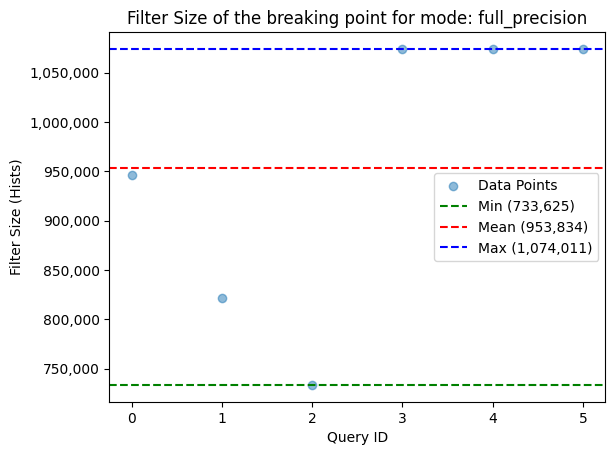

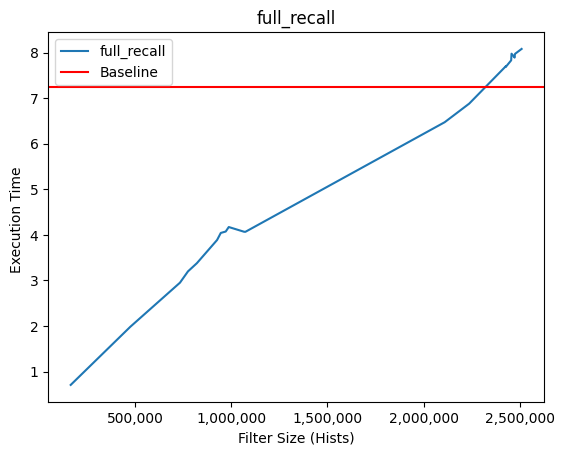

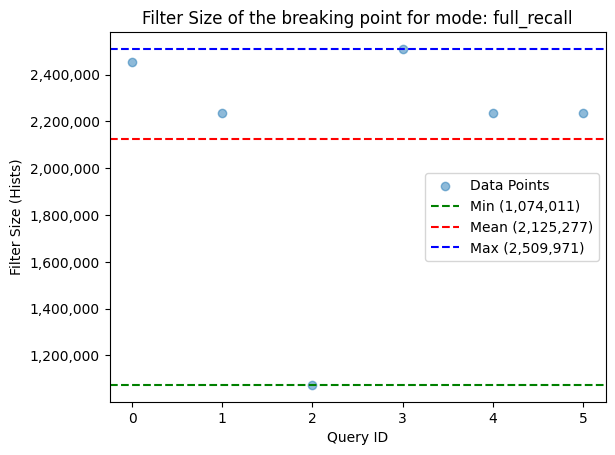

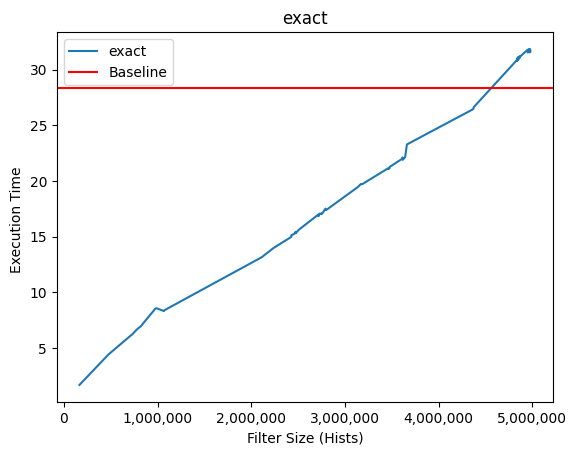

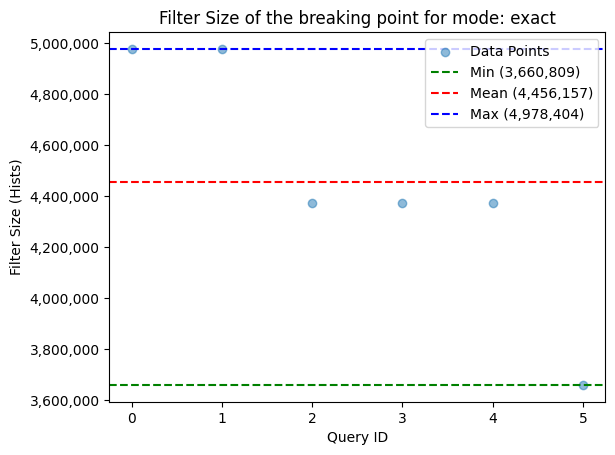

In [2]:
# One plot for each fainder mode 
# Use filter_size 0 as the baseline
# x-axis: filter_size y-axis: execution_time
df_baseline = df_latest[df_latest["filter_size"] == 0]

df_latest = df_latest[df_latest["filter_size"] != 0]


for fainder_mode in df_latest["fainder_mode"].unique():
    df_fainder_mode = df_latest[df_latest["fainder_mode"] == fainder_mode]
    df_fainder_mode = df_fainder_mode.groupby("filter_size")["execution_time"].mean().reset_index()
    df_fainder_mode = df_fainder_mode.sort_values("filter_size")
    df_fainder_mode = df_fainder_mode.reset_index(drop=True)
    df_baseline_mode = df_baseline[df_baseline["fainder_mode"] == fainder_mode]

    plt.figure()
    plt.title(fainder_mode)
    plt.xlabel("Filter Size (Hists)")
    plt.ylabel("Execution Time ")
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # type: ignore
    plt.plot(df_fainder_mode["filter_size"], df_fainder_mode["execution_time"], label=fainder_mode)
    plt.axhline(y=df_baseline_mode["execution_time"].mean(), color='r', linestyle='-', label="Baseline")
    plt.legend()
    plt.show()


    # one plot for min, mean, max of biggest filter size per query (fainder mode change)
    # x-axis: query-id y-axis: filter_size
    df_fainder_mode = df_latest[df_latest["fainder_mode"] == fainder_mode]
    # Get only the max filter_size for each fainder_mode_change
    df_fainder_mode = df_fainder_mode.loc[df_fainder_mode.groupby('fainder_mode_change')['filter_size'].idxmax()]
    df_fainder_mode.reset_index(drop=True, inplace=True)
    
    plt.figure()
    plt.title("Filter Size of the breaking point for mode: " + fainder_mode)
    # Scatter plot for all points
    plt.scatter(df_fainder_mode.index, df_fainder_mode["filter_size"], alpha=0.5, label='Data Points')
    # Horizontal lines for min, mean, max
    plt.axhline(y=df_fainder_mode["filter_size"].min(), color='g', linestyle='--', label=f'Min ({int(df_fainder_mode["filter_size"].min()):,})')
    plt.axhline(y=df_fainder_mode["filter_size"].mean(), color='r', linestyle='--', label=f'Mean ({int(df_fainder_mode["filter_size"].mean()):,})')
    plt.axhline(y=df_fainder_mode["filter_size"].max(), color='b', linestyle='--', label=f'Max ({int(df_fainder_mode["filter_size"].max()):,})')
    plt.xlabel("Query ID")
    plt.ylabel("Filter Size (Hists)")
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # type: ignore
    plt.legend()
    plt.show()


